In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
img = cv2.imread('runway.jpg', cv2.IMREAD_COLOR)

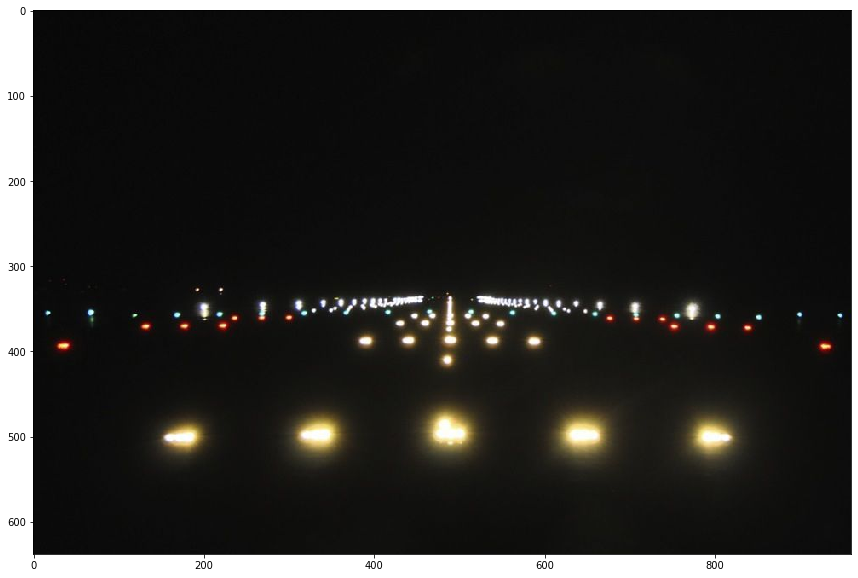

In [3]:
#Show the image with matplotlib
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

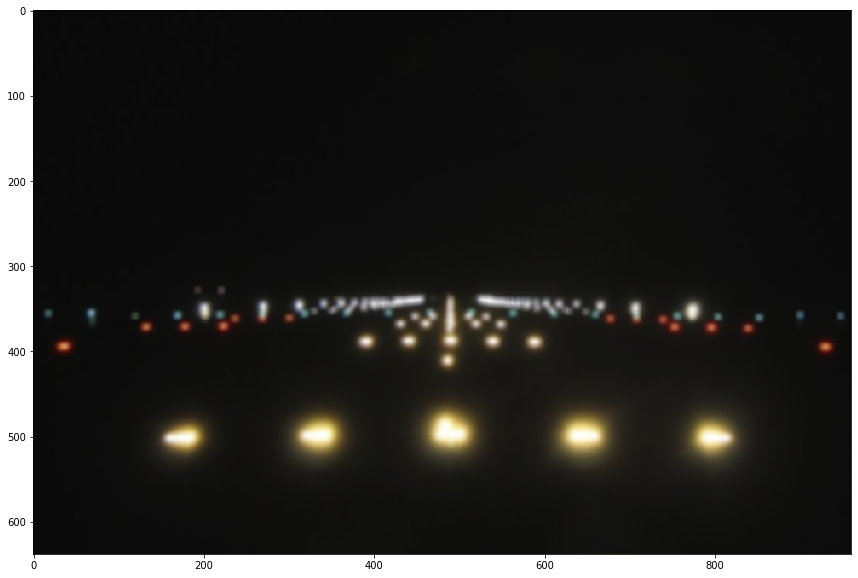

In [4]:
blur = cv2.blur(img,(8,8))
##blur = blur[390:638, 0:960]

plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

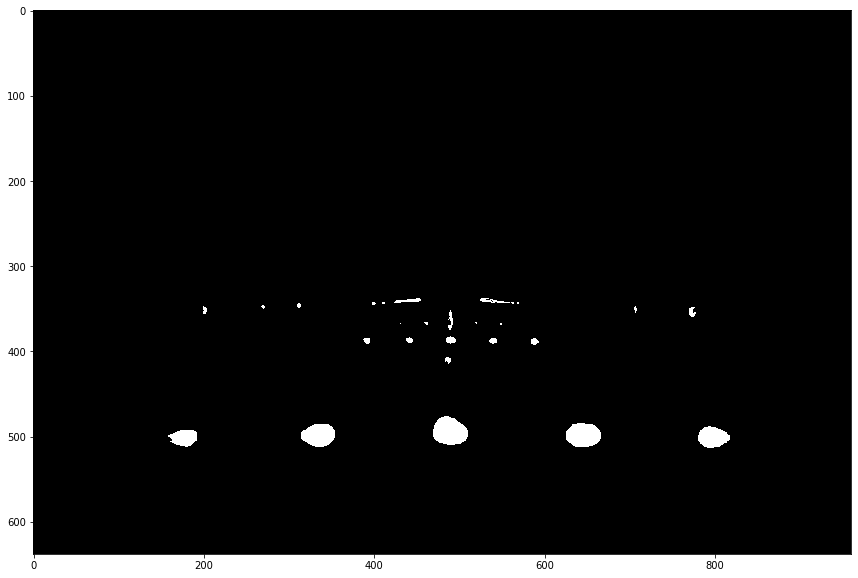

In [5]:
## hsv filter
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

lights = cv2.inRange(hsv, (15,0,200), (180,255,255))
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(lights, cv2.COLOR_GRAY2BGR))
plt.show()

In [6]:
##plot pixel locations
plt.figure(figsize=(20,4))
data = np.array(list(indices))
xs = data.transpose()[0]   # or xs = data.T[0] or  xs = data[:,0]
ys = data.transpose()[1]
plt.plot(np.array(list(indices[1])), np.array(list(indices[0])), 'ro')

ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1])        # invert the axis
ax.xaxis.tick_top()                     # and move the X-Axis      

plt.show()

NameError: name 'indices' is not defined

<Figure size 1440x288 with 0 Axes>

In [7]:
## Cluster light hypothesis by using DBSCAN
light_pixels = np.array(list(indices[:])).T
db = DBSCAN(eps=5, min_samples=40).fit(light_pixels)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

plt.figure(figsize=(20,4))
data = np.array(list(indices))
xs = np.array(list(indices[1]))
ys = np.array(list(indices[0]))
plt.scatter(xs, ys, c=labels, cmap='jet')

ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1])        # invert the axis
ax.xaxis.tick_top()                     # and move the X-Axis      

plt.show()




## Calculate single location per cluster buttom middle of each cluster as homography input
light_locations =  np.zeros([0, 2])

for cluster_id in range(np.max(labels)+1):
    light_locations = np.vstack((light_locations, np.array([np.mean(xs[labels == [cluster_id]]), np.max(ys[labels == [cluster_id]])])))

plt.figure(figsize=(20,4))
plt.plot(light_locations[:,0], light_locations[:,1], 'rd')

ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1])        # invert the axis
ax.xaxis.tick_top()                     # and move the X-Axis      

plt.show()

NameError: name 'indices' is not defined

In [8]:
np.set_printoptions(threshold=100)
print(light_locations)

NameError: name 'light_locations' is not defined